In [1]:
!pip install imutils

In [2]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import cv2
import os

In [3]:
# from os.path import dirname, join,__file__
prototxtPath = 'deploy.prototxt.txt'
weightsPath= 'res10_300x300_ssd_iter_140000.caffemodel'

In [4]:
prototxtPath

'deploy.prototxt.txt'

In [5]:
net=cv2.dnn.readNet(weightsPath,prototxtPath)

In [6]:
net

< cv2.dnn.Net 00000257DB2C3FB0>

In [8]:
## Load model
model=load_model(r'custom_4370_32_100_v2.h5')

In [17]:
dataset = "test"
imagePaths=list(paths.list_images(dataset))
data=[]

for i in imagePaths:
    data.append(i)


In [30]:
image=cv2.imread("daniel-no-mask.jpeg")

In [31]:
image.shape

(1333, 2000, 3)

In [32]:
(h,w)=image.shape[:2]

In [33]:
blob=cv2.dnn.blobFromImage(image,1.0,(300,300),(104.0,177.0,123.0))
blob.shape
net.setInput(blob)
detections = net.forward()

In [34]:
detections

array([[[[0.        , 1.        , 0.99785703, ..., 0.14551698,
          0.5949609 , 0.49616086],
         [0.        , 1.        , 0.12678137, ..., 4.004555  ,
          4.841027  , 4.9837813 ],
         [0.        , 1.        , 0.12463406, ..., 0.9323255 ,
          0.1668955 , 0.9676955 ],
         ...,
         [0.        , 1.        , 0.08643559, ..., 0.28144795,
          0.8516011 , 0.35946435],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]]]], dtype=float32)

CONF:  0.99785703
1/1 [==============================] - 0s 21ms/step
MASK:  3.899395e-06
Without:  0.99999607
CONF:  0.12678137
CONF:  0.124634065
CONF:  0.124042876
CONF:  0.12398238
CONF:  0.12215456
CONF:  0.12204905
CONF:  0.121187955
CONF:  0.12039963
CONF:  0.119491935
CONF:  0.11944035
CONF:  0.11930769
CONF:  0.11836352
CONF:  0.11806744
CONF:  0.118031755
CONF:  0.117715955
CONF:  0.117074825
CONF:  0.11683966
CONF:  0.11682634
CONF:  0.11604032
CONF:  0.11601983
CONF:  0.11534426
CONF:  0.115041
CONF:  0.114901625
CONF:  0.11458587
CONF:  0.114582226
CONF:  0.11419027
CONF:  0.11393428
CONF:  0.11361825
CONF:  0.112872064
CONF:  0.11280073
CONF:  0.112374745
CONF:  0.11214057
CONF:  0.11203499
CONF:  0.11185303
CONF:  0.11152873
CONF:  0.11078854
CONF:  0.11059192
CONF:  0.11055562
CONF:  0.11031526
CONF:  0.11010636
CONF:  0.10982981
CONF:  0.1091127
CONF:  0.10908996
CONF:  0.10898924
CONF:  0.10888607
CONF:  0.10873551
CONF:  0.10867298
CONF:  0.10865653
CONF:  0.10863065

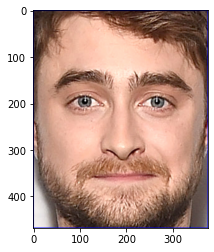

In [36]:
#loop over the detections
det =[]
a=0
for i in range(0,detections.shape[2]):
    confidence=detections[0,0,i,2]
    print("CONF: ",confidence)
    if confidence>0.3:
        box=detections[0,0,i,3:7]*np.array([w,h,w,h])
        (startX,startY,endX,endY)=box.astype('int')
        (startX,startY)=(max(0,startX),max(0,startY))
        (endX,endY)=(min(w-1,endX), min(h-1,endY))
        face=image[startY:endY, startX:endX]
        face=cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
        plt.imshow(face)
        face=cv2.resize(face,(96,96))
        det.append(face)
        face=img_to_array(face)
        face=preprocess_input(face)
        face=np.expand_dims(face,axis=0)
        
        (withoutMask,mask)=model.predict(face)[0]
        print("MASK: ",mask)
        print("Without: ",withoutMask)
        #determine the class label and color we will use to draw the bounding box and text
        label='Mask' if mask>withoutMask else 'No Mask'
        color=(0,255,0) if label=='Mask' else (255,0,0)
        #include the probability in the label
        label="{}: {:.2f}%".format(label,max(mask,withoutMask)*100)
        
        #display the label and bounding boxes
        cv2.putText(image,label,(startX,startY-10),cv2.FONT_HERSHEY_SIMPLEX,0.45,color,2)
        cv2.rectangle(image,(startX,startY),(endX,endY),color,2)   
        a=a+1
# plt.imshow(det[1])
    

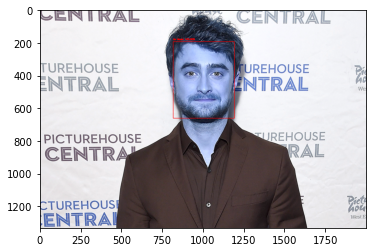

In [37]:
plt.imshow(image)